              Open    High    Low  Close      Volume  Ex-Dividend  \
Date                                                                
2018-03-21  92.930  94.050  92.21  92.48  23753263.0          0.0   
2018-03-22  91.265  91.750  89.66  89.79  37578166.0          0.0   
2018-03-23  89.500  90.460  87.08  87.18  42159397.0          0.0   
2018-03-26  90.610  94.000  90.40  93.78  55031149.0          0.0   
2018-03-27  94.940  95.139  88.51  89.47  53704562.0          0.0   

            Split Ratio  Adj. Open  Adj. High  Adj. Low  Adj. Close  \
Date                                                                  
2018-03-21          1.0     92.930     94.050     92.21       92.48   
2018-03-22          1.0     91.265     91.750     89.66       89.79   
2018-03-23          1.0     89.500     90.460     87.08       87.18   
2018-03-26          1.0     90.610     94.000     90.40       93.78   
2018-03-27          1.0     94.940     95.139     88.51       89.47   

            Adj. V

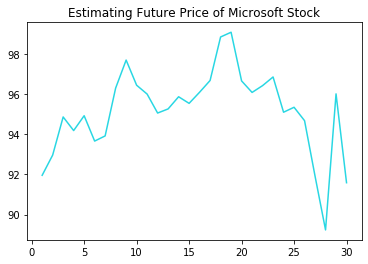

In [14]:
import quandl
import pandas as pd
import numpy as np
import datetime

from sklearn.linear_model import LinearRegression
from sklearn import preprocessing, svm
from sklearn.model_selection import train_test_split

df=quandl.get("WIKI/MSFT")

print(df.tail())

df=df[['Adj. Close']]

forecast_out = int(30) #predicting 30 days into future
df['Prediction'] = df[['Adj. Close']].shift(-forecast_out) #label column with data shifted 30 units up
print(df.tail())

x = np.array(df.drop(['Prediction'], 1))
x = preprocessing.scale(x)

x_forecast = x[-forecast_out:] #set x_forecast equal to last 30
x=x[:-forecast_out] # remove last 30 from x

y=np.array(df['Prediction'])
y=y[:-forecast_out]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Training
clf=LinearRegression()
clf.fit(x_train,y_train)
#Testing
confidence=clf.score(x_test, y_test)
print("confidence: ", confidence)

forecast_prediction = clf.predict(x_forecast)
print(forecast_prediction)

x_values = np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30])
import matplotlib.pyplot as plt
plt.title("Estimating Future Price of Microsoft Stock")
y_values = forecast_prediction
plt.plot(x_values, y_values, color='#29d7e3', label="data")